# Final project - Ariel Ackerman

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("test11").getOrCreate()

In [2]:
from pyspark.sql import SparkSession

In [3]:
df = spark.read.csv(
    path="Dataset_R6.txt",
    sep=",",
    header=True,
    quote="",
    inferSchema=True,
    )

In [4]:
df.printSchema()
df.show()

root
 |-- row  number: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- work sector: string (nullable = true)
 |-- salery: integer (nullable = true)
 |-- savings: integer (nullable = true)
 |-- Food expenses (month): integer (nullable = true)
 |-- zip code: integer (nullable = true)
 |-- other expenses (month): integer (nullable = true)
 |-- educaion years: integer (nullable = true)
 |-- economic class: integer (nullable = true)

+-----------+---+-----------+------+-------+---------------------+--------+----------------------+--------------+--------------+
|row  number|age|work sector|salery|savings|Food expenses (month)|zip code|other expenses (month)|educaion years|economic class|
+-----------+---+-----------+------+-------+---------------------+--------+----------------------+--------------+--------------+
|          1| 38|          B|  8361|  37085|                 1115|   23158|                  1449|            19|             7|
|          2| 52|          C|  3

In [5]:
import pandas as pd
pd.DataFrame(df.take(10), columns=df.columns).transpose()

,0,1,2,3,4,5,6,7,8,9
row number,1,2,3,4,5,6,7,8,9,10
age,38,52,35,47,48,28,46,36,42,32
work sector,B,C,D,E,B,A,A,C,A,B
salery,8361,3821,2316,6788,6564,5163,4605,3060,5791,7178
savings,37085,4991,5011,88345,22220,14883,16054,6370,33470,22034
Food expenses (month),1115,720,461,1023,1190,880,1246,765,1128,1334
zip code,23158,25483,28041,29018,23021,21076,21424,26719,18256,22662
other expenses (month),1449,1169,1631,1645,1289,1120,2144,1905,2132,1542
educaion years,19,13,12,24,19,17,16,15,15,14
economic class,7,3,1,6,6,5,3,2,4,6


In [6]:
num_records = df.count()
print(f"This table contains {num_records} records.")


This table contains 6000 records.


In [7]:
from pyspark.sql.functions import *

null_counts = [df.where(col(column).isNull()).count() for column in ["age", "work sector", "salery", "savings", "Food expenses (month)", "zip code", "other expenses (month)", "educaion years", "economic class"]]

columns_with_nulls = ["age", "work sector", "salery", "savings", "Food expenses (month)", "zip code", "other expenses (month)", "educaion years", "economic class"]

# Sort the columns based on the count of null values in descending order
sorted_columns = sorted(zip(columns_with_nulls, null_counts), key=lambda x: x[1], reverse=True)

print("Columns with null values and their counts (in descending order):")
for column, count in sorted_columns:
    print(f"{column}: {count}")


Columns with null values and their counts (in descending order):
zip code: 87
work sector: 81
economic class: 51
age: 14
salery: 14
savings: 14
Food expenses (month): 14
other expenses (month): 14
educaion years: 14


In [8]:

df = spark.read.csv('Dataset_R6.txt', header=True, inferSchema=True)

# Count the null values in each column
null_counts = df.select([sum(col(column).isNull().cast("int")).alias(column) for column in df.columns])

null_counts.show()


+-----------+---+-----------+------+-------+---------------------+--------+----------------------+--------------+--------------+
|row  number|age|work sector|salery|savings|Food expenses (month)|zip code|other expenses (month)|educaion years|economic class|
+-----------+---+-----------+------+-------+---------------------+--------+----------------------+--------------+--------------+
|         30| 14|         81|    14|     14|                   14|      87|                    14|            14|            51|
+-----------+---+-----------+------+-------+---------------------+--------+----------------------+--------------+--------------+



In [9]:
df = spark.read.csv('Dataset_R6.txt', header=True, inferSchema=True)

# Drop null values
df_without_nulls = df.dropna()

# Count the number of records in the new DataFrame
record_count = df_without_nulls.count()

# Print the count of records
print("Number of records in the new DataFrame:", record_count)


Number of records in the new DataFrame: 5779


In this table we have 221 nulls records

In [10]:
from pyspark.sql.functions import *

# Check for null values in each column
null_counts = [df_without_nulls.where(col(column).isNull()).count() for column in ["age", "work sector", "salery", "savings", "Food expenses (month)", "zip code", "other expenses (month)", "educaion years", "economic class"]]

columns_with_nulls = ["age", "work sector", "salery", "savings", "Food expenses (month)", "zip code", "other expenses (month)", "educaion years", "economic class"]
print("Columns with null values and their counts:")
for column, count in zip(columns_with_nulls, null_counts):
    print(f"{column}: {count}")

Columns with null values and their counts:
age: 0
work sector: 0
salery: 0
savings: 0
Food expenses (month): 0
zip code: 0
other expenses (month): 0
educaion years: 0
economic class: 0


In [72]:
# Calculate the sum of "salery" - "Food expenses" - "other expenses" columns
df = df_without_nulls.withColumn("saving_sum", col("salery") - col("Food expenses (month)") - col("other expenses (month)"))

pd.DataFrame(df.take(10), columns=df.columns).transpose()

,0,1,2,3,4,5,6,7,8,9
row number,1,2,3,4,5,6,7,8,9,10
age,38,52,35,47,48,28,46,36,42,32
work sector,B,C,D,E,B,A,A,C,A,B
salery,8361,3821,2316,6788,6564,5163,4605,3060,5791,7178
savings,37085,4991,5011,88345,22220,14883,16054,6370,33470,22034
Food expenses (month),1115,720,461,1023,1190,880,1246,765,1128,1334
zip code,23158,25483,28041,29018,23021,21076,21424,26719,18256,22662
other expenses (month),1449,1169,1631,1645,1289,1120,2144,1905,2132,1542
educaion years,19,13,12,24,19,17,16,15,15,14
economic class,7,3,1,6,6,5,3,2,4,6


In [73]:
from pyspark.sql.functions import avg, col, when

# Calculate the average of the "expenses_sum" column
average_expenses_sum = df.select(avg(col("saving_sum"))).first()[0]

# Add a new column indicating if "expenses_sum" is above the average
df = df.withColumn("above_saving_average", when(col("saving_sum") > average_expenses_sum, "yes").otherwise("no"))

pd.DataFrame(df.take(10), columns=df.columns).transpose()


,0,1,2,3,4,5,6,7,8,9
row number,1,2,3,4,5,6,7,8,9,10
age,38,52,35,47,48,28,46,36,42,32
work sector,B,C,D,E,B,A,A,C,A,B
salery,8361,3821,2316,6788,6564,5163,4605,3060,5791,7178
savings,37085,4991,5011,88345,22220,14883,16054,6370,33470,22034
Food expenses (month),1115,720,461,1023,1190,880,1246,765,1128,1334
zip code,23158,25483,28041,29018,23021,21076,21424,26719,18256,22662
other expenses (month),1449,1169,1631,1645,1289,1120,2144,1905,2132,1542
educaion years,19,13,12,24,19,17,16,15,15,14
economic class,7,3,1,6,6,5,3,2,4,6


In [74]:
#Converts "above_average" string values to index values
from pyspark.ml.feature import StringIndexer
class_int = StringIndexer(inputCol="above_saving_average", outputCol='class')
class_int_model = class_int.fit(df)
df = class_int_model.transform(df)

In [75]:
#Converts 'work sector' string values to index values
marital_int = StringIndexer(inputCol='work sector', outputCol='work sector_int')
marital_int_model = marital_int.fit(df)
df = marital_int_model.transform(df)


In [76]:
pd.DataFrame(df.take(10), columns=df.columns).transpose()

,0,1,2,3,4,5,6,7,8,9
row number,1,2,3,4,5,6,7,8,9,10
age,38,52,35,47,48,28,46,36,42,32
work sector,B,C,D,E,B,A,A,C,A,B
salery,8361,3821,2316,6788,6564,5163,4605,3060,5791,7178
savings,37085,4991,5011,88345,22220,14883,16054,6370,33470,22034
Food expenses (month),1115,720,461,1023,1190,880,1246,765,1128,1334
zip code,23158,25483,28041,29018,23021,21076,21424,26719,18256,22662
other expenses (month),1449,1169,1631,1645,1289,1120,2144,1905,2132,1542
educaion years,19,13,12,24,19,17,16,15,15,14
economic class,7,3,1,6,6,5,3,2,4,6


In [77]:
#Drop the string values

In [78]:
df = df.drop('work sector')

In [79]:
df = df.drop('above_saving_average')

In [80]:
pd.DataFrame(df.take(10), columns=df.columns).transpose()

,0,1,2,3,4,5,6,7,8,9
row number,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
age,38.0,52.0,35.0,47.0,48.0,28.0,46.0,36.0,42.0,32.0
salery,8361.0,3821.0,2316.0,6788.0,6564.0,5163.0,4605.0,3060.0,5791.0,7178.0
savings,37085.0,4991.0,5011.0,88345.0,22220.0,14883.0,16054.0,6370.0,33470.0,22034.0
Food expenses (month),1115.0,720.0,461.0,1023.0,1190.0,880.0,1246.0,765.0,1128.0,1334.0
zip code,23158.0,25483.0,28041.0,29018.0,23021.0,21076.0,21424.0,26719.0,18256.0,22662.0
other expenses (month),1449.0,1169.0,1631.0,1645.0,1289.0,1120.0,2144.0,1905.0,2132.0,1542.0
educaion years,19.0,13.0,12.0,24.0,19.0,17.0,16.0,15.0,15.0,14.0
economic class,7.0,3.0,1.0,6.0,6.0,5.0,3.0,2.0,4.0,6.0
saving_sum,5797.0,1932.0,224.0,4120.0,4085.0,3163.0,1215.0,390.0,2531.0,4302.0


In [81]:
#Sample the data to groups of 46 random values and check correlation between column and record

In [82]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

CorrDF = df.sample(False, 1.0, 46)

vector_features = "features"
assembler = VectorAssembler(inputCols=CorrDF.columns, outputCol=vector_features)
df_vector = assembler.transform(df).select(vector_features)
matrix = Correlation.corr(df_vector, vector_features, 'pearson')

result = matrix.collect()[0]["pearson({})".format(vector_features)].values
reshape_matrix = pd.DataFrame(result.reshape(-1, len(CorrDF.columns)), columns=CorrDF.columns, index=CorrDF.columns)

print(reshape_matrix)

                        row  number       age    salery   savings  \
row  number                1.000000 -0.026753 -0.001224  0.000752   
age                       -0.026753  1.000000 -0.006649 -0.000296   
salery                    -0.001224 -0.006649  1.000000  0.730396   
savings                    0.000752 -0.000296  0.730396  1.000000   
Food expenses (month)     -0.003909 -0.000515  0.826548  0.705219   
zip code                   0.006970 -0.004302  0.004796  0.064258   
other expenses (month)     0.003801  0.000697 -0.002267  0.007744   
educaion years            -0.009573  0.000282  0.662132  0.518467   
economic class            -0.002779 -0.006490  0.979906  0.712559   
saving_sum                -0.001184 -0.007794  0.973381  0.684822   
class                     -0.009214 -0.001744  0.858187  0.609685   
work sector_int           -0.010393 -0.006327 -0.287322  0.075438   

                        Food expenses (month)  zip code  \
row  number                         -0.0039

<ipython-input-83-dd5bd43e40e1>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figr.show()


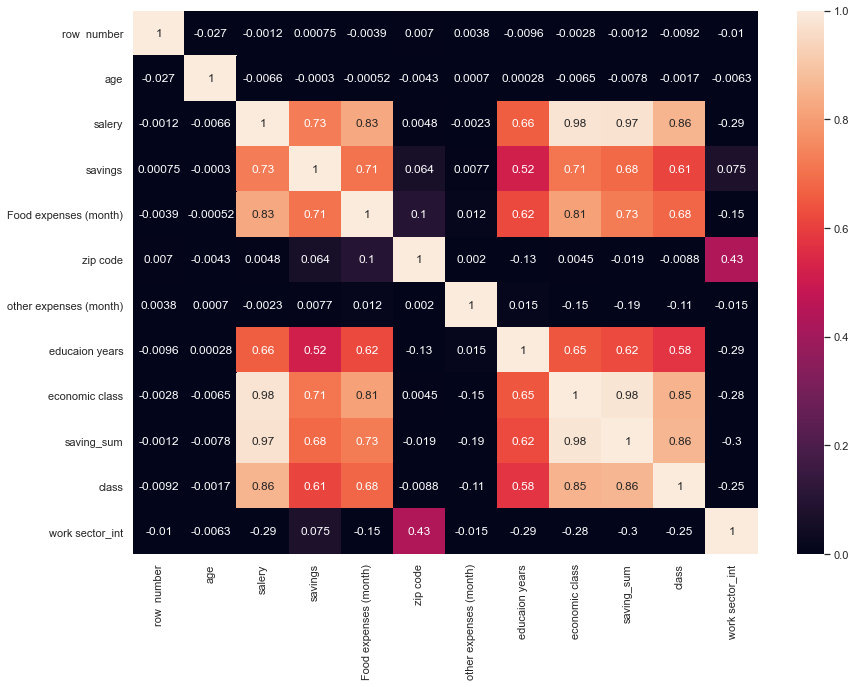

In [83]:
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
ax = sns.heatmap(reshape_matrix, vmin=0, vmax=1, annot=True)
figr = plt.gcf()
figr.set_size_inches(14, 10)
figr.show()

# conclusions

1. Salary and Expenses: There is a strong positive correlation between "salary" and "expenses_sum" (0.973381). This suggests that individuals with higher salaries tend to have higher overall expenses.


2. Salary and Food Expenses: There is a significant positive correlation between "salary" and "Food expenses (month)" (0.826548). This indicates that as salary increases, food expenses also tend to increase.


3. Economic Class and Salary: The variable "economic class" has a strong positive correlation with "salary" (0.979906). This implies that individuals in higher economic classes tend to have higher salaries.


4. Salary and Savings: "Salary" and "savings" have a moderate positive correlation (0.730396). This indicates that as salary increases, individuals tend to have higher savings.


5. Education Years and Salary: There is a moderate positive correlation between "education years" and "salary" (0.662132). This suggests that individuals with more education years tend to have higher salaries.

Positive Correlations: The variable "class" shows positive correlations with several other variables in the matrix. Specifically, it has a strong positive correlation with "expenses_sum" (0.862057), a moderate positive correlation with "salary" (0.858187), and a positive correlation with "economic class" (0.854472). These correlations suggest that higher values of "class" are associated with higher total expenses, higher salaries, and higher economic class.

# Missing values

Columns with null values :
zip code: 87
work sector: 81
economic class: 51
age: 14
salery: 14
savings: 14
Food expenses (month): 14
other expenses (month): 14
educaion years: 14

Work sector: With 81 null values, we can impute the missing values with the most frequent work sector category.

Economic class: has 51 null values, The variable "economic class" has a strong positive correlation with "salary" (0.979906). This implies that individuals in higher economic classes tend to have higher salaries.

Age, Salary, Savings, Food expenses (month), Other expenses (month), and Education years: With 14 null values for each of these columns, you have several options. One common approach is to impute the missing values using the mean.

In [84]:
df.groupby('class').count().toPandas()

,class,count
0,0.0,3072
1,1.0,2707


In [85]:
# Models that predicte if peaple "expenses_sum" is above the average

# Decision Tree

In [86]:
df.printSchema()

root
 |-- row  number: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- salery: integer (nullable = true)
 |-- savings: integer (nullable = true)
 |-- Food expenses (month): integer (nullable = true)
 |-- zip code: integer (nullable = true)
 |-- other expenses (month): integer (nullable = true)
 |-- educaion years: integer (nullable = true)
 |-- economic class: integer (nullable = true)
 |-- saving_sum: integer (nullable = true)
 |-- class: double (nullable = false)
 |-- work sector_int: double (nullable = false)



In [87]:
# Drop the 'class' column from the DataFrame
new_df = df.drop('class')

# Show the new DataFrame
new_df.show()


+-----------+---+------+-------+---------------------+--------+----------------------+--------------+--------------+----------+---------------+
|row  number|age|salery|savings|Food expenses (month)|zip code|other expenses (month)|educaion years|economic class|saving_sum|work sector_int|
+-----------+---+------+-------+---------------------+--------+----------------------+--------------+--------------+----------+---------------+
|          1| 38|  8361|  37085|                 1115|   23158|                  1449|            19|             7|      5797|            0.0|
|          2| 52|  3821|   4991|                  720|   25483|                  1169|            13|             3|      1932|            1.0|
|          3| 35|  2316|   5011|                  461|   28041|                  1631|            12|             1|       224|            4.0|
|          4| 47|  6788|  88345|                 1023|   29018|                  1645|            24|             6|      4120|         

In [88]:
feature_columns = df.columns[:-3]

In [89]:
print(feature_columns)

['row  number', 'age', 'salery', 'savings', 'Food expenses (month)', 'zip code', 'other expenses (month)', 'educaion years', 'economic class']


In [90]:
from pyspark.ml.feature import VectorAssembler

In [91]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=feature_columns,outputCol="features")

In [92]:
data_vector = assembler.transform(df)
data_vector.show()

+-----------+---+------+-------+---------------------+--------+----------------------+--------------+--------------+----------+-----+---------------+--------------------+
|row  number|age|salery|savings|Food expenses (month)|zip code|other expenses (month)|educaion years|economic class|saving_sum|class|work sector_int|            features|
+-----------+---+------+-------+---------------------+--------+----------------------+--------------+--------------+----------+-----+---------------+--------------------+
|          1| 38|  8361|  37085|                 1115|   23158|                  1449|            19|             7|      5797|  1.0|            0.0|[1.0,38.0,8361.0,...|
|          2| 52|  3821|   4991|                  720|   25483|                  1169|            13|             3|      1932|  0.0|            1.0|[2.0,52.0,3821.0,...|
|          3| 35|  2316|   5011|                  461|   28041|                  1631|            12|             1|       224|  0.0|            

In [93]:
(train, test) = data_vector.randomSplit([0.7,0.3], seed =2020)
print("train #: " + str(train.count()),"test #: " + str(test.count()))

train #: 4123 test #: 1656


In [94]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'class', maxDepth = 3)

In [95]:
dtModel = dt.fit(train)

In [97]:
dt_predictions = dtModel.transform(test)
dt_predictions.select('savings','salery', 'educaion years', 'economic class', 'saving_sum', 'work sector_int','class').show(10)

+-------+------+--------------+--------------+----------+---------------+-----+
|savings|salery|educaion years|economic class|saving_sum|work sector_int|class|
+-------+------+--------------+--------------+----------+---------------+-----+
|  33470|  5791|            15|             4|      2531|            2.0|  1.0|
|   7680|  3507|            10|             3|      1789|            4.0|  0.0|
|   2224|  3108|            14|             2|       308|            1.0|  0.0|
|   5181|  3034|            17|             2|       593|            1.0|  0.0|
|  93349|  7605|            20|             6|      3900|            3.0|  1.0|
|  26295|  6220|            17|             5|      2425|            3.0|  0.0|
|   3031|   979|            14|             0|     -1098|            4.0|  0.0|
|  28762|  8497|            18|             8|      6188|            0.0|  1.0|
|  10535|  3125|            16|             2|       155|            1.0|  0.0|
|   9484|  7531|            16|         

In [98]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
AccuracyDT = MulticlassClassificationEvaluator(labelCol = 'class', metricName = 'accuracy')
print(' DT Accuracy:', AccuracyDT.evaluate(dt_predictions))

 DT Accuracy: 0.9553140096618358


In [99]:
model = dt.fit(data_vector)
predictions = model.transform(data_vector)
predictions = model.transform(data_vector)
predictions.select(['class','age',"prediction","probability"]).show()

+-----+---+----------+--------------------+
|class|age|prediction|         probability|
+-----+---+----------+--------------------+
|  1.0| 38|       1.0|[0.00644606789858...|
|  0.0| 52|       0.0|[0.99924556771029...|
|  0.0| 35|       0.0|[0.99924556771029...|
|  1.0| 47|       1.0|[0.00644606789858...|
|  1.0| 48|       1.0|[0.00644606789858...|
|  1.0| 28|       1.0|[0.49411764705882...|
|  0.0| 46|       0.0|[0.99924556771029...|
|  0.0| 36|       0.0|[0.99924556771029...|
|  1.0| 42|       0.0|[0.54726368159203...|
|  1.0| 32|       1.0|[0.00644606789858...|
|  0.0| 47|       0.0|[0.99924556771029...|
|  1.0| 56|       1.0|[0.00644606789858...|
|  0.0| 65|       0.0|[0.99924556771029...|
|  0.0| 38|       0.0|[0.99924556771029...|
|  1.0| 46|       1.0|[0.14917127071823...|
|  0.0| 41|       0.0|[0.99924556771029...|
|  1.0| 58|       1.0|[0.00644606789858...|
|  0.0| 53|       0.0|[0.99924556771029...|
|  0.0| 57|       0.0|[0.99924556771029...|
|  0.0| 38|       1.0|[0.0064460

In [100]:
y_t = predictions.select(['class']).collect()
y_predictions = predictions.select(['prediction']).collect()
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_t, y_predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      3072
         1.0       0.94      0.96      0.95      2707

    accuracy                           0.95      5779
   macro avg       0.95      0.95      0.95      5779
weighted avg       0.95      0.95      0.95      5779



# Logistic Regression

In [101]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'class', maxIter=10)
lrModel = lr.fit(train)

In [103]:
lr_predictions = lrModel.transform(test)

lr_predictions.select('savings','salery', 'educaion years', 'economic class', 'saving_sum', 'work sector_int','class').show(10)

+-------+------+--------------+--------------+----------+---------------+-----+
|savings|salery|educaion years|economic class|saving_sum|work sector_int|class|
+-------+------+--------------+--------------+----------+---------------+-----+
|  33470|  5791|            15|             4|      2531|            2.0|  1.0|
|   7680|  3507|            10|             3|      1789|            4.0|  0.0|
|   2224|  3108|            14|             2|       308|            1.0|  0.0|
|   5181|  3034|            17|             2|       593|            1.0|  0.0|
|  93349|  7605|            20|             6|      3900|            3.0|  1.0|
|  26295|  6220|            17|             5|      2425|            3.0|  0.0|
|   3031|   979|            14|             0|     -1098|            4.0|  0.0|
|  28762|  8497|            18|             8|      6188|            0.0|  1.0|
|  10535|  3125|            16|             2|       155|            1.0|  0.0|
|   9484|  7531|            16|         

In [104]:
import pandas as pd
pd.DataFrame(lr_predictions.take(10), columns=lr_predictions.columns).transpose()

,0,1,2,3,4,5,6,7,8,9
row number,9,13,14,16,17,20,21,23,31,36
age,42,65,38,41,58,38,37,38,58,43
salery,5791,3507,3108,3034,7605,6220,979,8497,3125,7531
savings,33470,7680,2224,5181,93349,26295,3031,28762,10535,9484
Food expenses (month),1128,498,978,468,1723,2117,427,1193,880,2031
zip code,18256,27931,26052,25700,29057,29788,28267,23138,24951,29505
other expenses (month),2132,1220,1822,1973,1982,1678,1650,1116,2090,1734
educaion years,15,10,14,17,20,17,14,18,16,16
economic class,4,3,2,2,6,5,0,8,2,6
saving_sum,2531,1789,308,593,3900,2425,-1098,6188,155,3766


In [105]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
AccuracyDT = MulticlassClassificationEvaluator(labelCol = 'class', metricName = 'accuracy')
print(' DT Accuracy:', AccuracyDT.evaluate(lr_predictions))

 DT Accuracy: 0.9836956521739131


In [106]:
y_t = lr_predictions.select(['class']).collect()
y_predictions = lr_predictions.select(['prediction']).collect()
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_t, y_predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       905
         1.0       0.98      0.98      0.98       751

    accuracy                           0.98      1656
   macro avg       0.98      0.98      0.98      1656
weighted avg       0.98      0.98      0.98      1656



# Random Forest

In [107]:
from pyspark.ml.classification import RandomForestClassifier
RF = RandomForestClassifier(featuresCol = 'features', labelCol = 'class')
RFModel = RF.fit(train)
RF_predictions = RFModel.transform(test)

In [109]:
RF_predictions.select('savings','salery', 'educaion years', 'economic class', 'saving_sum', 'work sector_int','class').show(10)

+-------+------+--------------+--------------+----------+---------------+-----+
|savings|salery|educaion years|economic class|saving_sum|work sector_int|class|
+-------+------+--------------+--------------+----------+---------------+-----+
|  33470|  5791|            15|             4|      2531|            2.0|  1.0|
|   7680|  3507|            10|             3|      1789|            4.0|  0.0|
|   2224|  3108|            14|             2|       308|            1.0|  0.0|
|   5181|  3034|            17|             2|       593|            1.0|  0.0|
|  93349|  7605|            20|             6|      3900|            3.0|  1.0|
|  26295|  6220|            17|             5|      2425|            3.0|  0.0|
|   3031|   979|            14|             0|     -1098|            4.0|  0.0|
|  28762|  8497|            18|             8|      6188|            0.0|  1.0|
|  10535|  3125|            16|             2|       155|            1.0|  0.0|
|   9484|  7531|            16|         

In [110]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
AccuracyRF = MulticlassClassificationEvaluator(labelCol = 'class', metricName = 'accuracy')
print(' RF Accuracy:', AccuracyRF.evaluate(RF_predictions))

 RF Accuracy: 0.9704106280193237


In [111]:
y_t = RF_predictions.select(['class']).collect()
y_predictions = RF_predictions.select(['prediction']).collect()
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_t, y_predictions))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       905
         1.0       0.96      0.98      0.97       751

    accuracy                           0.97      1656
   macro avg       0.97      0.97      0.97      1656
weighted avg       0.97      0.97      0.97      1656



In [129]:
pd.DataFrame(df.take(10), columns=df.columns).transpose()

,0,1,2,3,4,5,6,7,8,9
row number,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
age,38.0,52.0,35.0,47.0,48.0,28.0,46.0,36.0,42.0,32.0
salery,8361.0,3821.0,2316.0,6788.0,6564.0,5163.0,4605.0,3060.0,5791.0,7178.0
savings,37085.0,4991.0,5011.0,88345.0,22220.0,14883.0,16054.0,6370.0,33470.0,22034.0
Food expenses (month),1115.0,720.0,461.0,1023.0,1190.0,880.0,1246.0,765.0,1128.0,1334.0
zip code,23158.0,25483.0,28041.0,29018.0,23021.0,21076.0,21424.0,26719.0,18256.0,22662.0
other expenses (month),1449.0,1169.0,1631.0,1645.0,1289.0,1120.0,2144.0,1905.0,2132.0,1542.0
educaion years,19.0,13.0,12.0,24.0,19.0,17.0,16.0,15.0,15.0,14.0
economic class,7.0,3.0,1.0,6.0,6.0,5.0,3.0,2.0,4.0,6.0
saving_sum,5797.0,1932.0,224.0,4120.0,4085.0,3163.0,1215.0,390.0,2531.0,4302.0


# The chosen method is - Logistic Regression 
with the best accuracy precision, more then Random Forest and Decision Tree

# Fill the nulls with corralte information

Work sector: With 81 null values, we can impute the missing values with the most frequent work sector category.

Economic class: has 51 null values, The variable "economic class" has a strong positive correlation with "salary" (0.979906). This implies that individuals in higher economic classes tend to have higher salaries.

Age, Salary, Savings, Food expenses (month), Other expenses (month), and Education years: With 14 null values for each of these columns, you have several options. One common approach is to impute the missing values using the mean.

In [130]:
df_copy = spark.read.csv(
    path="dataset_R6.txt",
    sep=",",
    header=True,
    quote="",
    inferSchema=True
)

Work sector: With 81 null values, we can impute the missing values with the most frequent work sector category.

In [131]:
# Identify the column with null values
target_column = "work sector"

# Find the correlated column
correlated_column = "economic class"

# Compute the mode of the correlated column
mode_value = df_copy.select(correlated_column).groupBy(correlated_column).count().orderBy(col("count").desc()).first()[correlated_column]

# Fill null values with the mode value
df_filled = df_copy.withColumn(target_column, when(col(target_column).isNull(), mode_value).otherwise(col(target_column)))



Economic class: has 51 null values, The variable "economic class" has a strong positive correlation with "salary" (0.979906). This implies that individuals in higher economic classes tend to have higher salaries.

In [132]:
# Identify rows with null values in the "Economic class" column
null_economic_class = df.where(col("economic class").isNull())

# Calculate the mean salary for each economic class category
mean_salaries = df.groupBy("economic class").agg(mean("salery").alias("mean_salary"))

# Find the economic class category with the highest mean salary
highest_mean_salary = mean_salaries.orderBy(col("mean_salary").desc()).first()["economic class"]

# Fill null values in the "Economic class" column with the category with the highest mean salary
df_filled = df.withColumn("economic class", when(col("economic class").isNull(), highest_mean_salary).otherwise(col("economic class")))


Age, Salary, Savings, Food expenses (month), Other expenses (month), and Education years: With 14 null values for each of these columns, you have several options. One common approach is to impute the missing values using the mean.

In [133]:
# Calculate the mean of each column
mean_age = df.select(mean("age")).first()[0]
mean_salary = df.select(mean("salery")).first()[0]
mean_savings = df.select(mean("savings")).first()[0]
mean_food_expenses = df.select(mean("Food expenses (month)")).first()[0]
mean_other_expenses = df.select(mean("other expenses (month)")).first()[0]
mean_education_years = df.select(mean("educaion years")).first()[0]

# Fill the null values with the mean values
df_filled = df.fillna({
    "age": mean_age,
    "salery": mean_salary,
    "savings": mean_savings,
    "Food expenses (month)": mean_food_expenses,
    "other expenses (month)": mean_other_expenses,
    "educaion years": mean_education_years
})


In [134]:
pass_count = df.filter(col("class") == 1).count()
print("Number of peaple who expense over the average:", pass_count)

Number of peaple who expense over the average: 2707


In [135]:
average_age = df.select(avg(col("age"))).first()[0]
print(f"The average age is: {average_age}")


The average age is: 40.65391936321163


In [136]:
savings_by_class = df.groupBy("economic class").sum("savings").withColumnRenamed("sum(savings)", "total_savings")
savings_by_class_sorted = savings_by_class.orderBy(col("total_savings").asc())
savings_by_class_sorted.show()

+--------------+-------------+
|economic class|total_savings|
+--------------+-------------+
|             0|       470032|
|             9|       836104|
|             1|      2807026|
|             2|      7518691|
|             3|     11310388|
|             5|     12691008|
|             8|     13158292|
|             4|     18924936|
|             6|     25442358|
|             7|     29795085|
+--------------+-------------+



In [137]:
max_salary_education = df.filter(col("educaion years") >= 20).select(max(col("salery"))).first()[0]
print(f"The maximum salary among peaple with 20 or more years of education is: {max_salary_education}")


The maximum salary among peaple with 20 or more years of education is: 10499


In [138]:
records_savings_greater_than_expenses = df.filter(col("savings") > col("salery")).count()
print(f"The number of peaple where savings are greater then salary is: {records_savings_greater_than_expenses}")


The number of peaple where savings are greater then salary is: 5422


In [139]:
df_age_category = df.withColumn("age_category", 
                                when(col("age") > 55, "old")
                                .when((col("age") >= 40) & (col("age") <= 55), "adult")
                                .when(col("age") < 40, "young"))

category_counts = df_age_category.groupBy("age_category").count()

salary_avg = df_age_category.groupBy("age_category").agg(avg("salery").alias("average_salary"))
salary_avg.show()


+------------+-----------------+
|age_category|   average_salary|
+------------+-----------------+
|         old| 5051.94696969697|
|       adult|5219.088139281828|
|       young|5220.993526275704|
+------------+-----------------+

